In [1]:
from experiment import Experiment
from utils import save_result
%matplotlib inline

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
var_dict = dict(
    categorical_vars = ['Work-accident', 'promotion-last-5years', 'sales', 'salary'],
    numerical_vars = ['satisfaction-level', 'last-evaluation', 'average-montly-hours',
                      'number-project', 'time-spend-company'],
    class_var = 'left'
)

In [3]:
exp = Experiment('data/HR_comma_sep.csv',
                 var_dict,
                 embedding_dim=32,
                 lr=0.1,
                 cv=5,
                 weight_decay=0.0,
                 batch_size=1024,
                 n_epoch=100,
                 verbose=True,
                 n_bins_range=[3, 5, 7],
                 n_init_bins_list=[10, 15, 20],
                 co_occur_cutoff=2)

In [4]:
exp.data.shape

(14999, 10)

In [5]:
exp.perform_exp()

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:838: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:838: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:838: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:838: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:838: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))


>>> Epoch = 1
Loss = 1.504544973373413
>>> Epoch = 2
Loss = 1.4178376197814941
>>> Epoch = 3
Loss = 1.304779052734375
>>> Epoch = 4
Loss = 1.4110584259033203
>>> Epoch = 5
Loss = 1.254047155380249
>>> Epoch = 6
Loss = 1.303220510482788
>>> Epoch = 7
Loss = 1.3011949062347412
>>> Epoch = 8
Loss = 1.3534057140350342
>>> Epoch = 9
Loss = 1.2604576349258423
>>> Epoch = 10
Loss = 1.2573903799057007
>>> Epoch = 11
Loss = 1.273071050643921
>>> Epoch = 12
Loss = 1.2812464237213135
>>> Epoch = 1
Loss = 1.679703712463379
>>> Epoch = 2
Loss = 1.5603818893432617
>>> Epoch = 3
Loss = 1.422526240348816
>>> Epoch = 4
Loss = 1.53333580493927
>>> Epoch = 5
Loss = 1.3671282529830933
>>> Epoch = 6
Loss = 1.423280119895935
>>> Epoch = 7
Loss = 1.428549885749817
>>> Epoch = 8
Loss = 1.4817277193069458
>>> Epoch = 9
Loss = 1.3841688632965088
>>> Epoch = 10
Loss = 1.3685795068740845
>>> Epoch = 11
Loss = 1.386993408203125
>>> Epoch = 1
Loss = 1.8001989126205444
>>> Epoch = 2
Loss = 1.686808466911316
>>> Epoc

In [6]:
result = exp.get_result()

In [7]:
result

,disc_method,dt_acc_depth=2,dt_acc_depth=3,dt_acc_depth=4,dt_acc_depth=5,dt_acc_depth=6,lr_acc_C=0.1,lr_acc_C=0.3,lr_acc_C=0.5,lr_acc_C=1.0,lr_acc_C=3.0,n_disc_cols,nb_acc,rf_acc_n_est=10,rf_acc_n_est=20,rf_acc_n_est=30,rf_acc_n_est=5
0,raw,0.823,0.953,0.966,0.972,0.976,0.763,0.768,0.769,0.769,0.769,5,0.762,0.989,0.990,0.989,0.987
1,sb_10,0.854,0.911,0.927,0.942,0.942,0.897,0.898,0.898,0.898,0.899,15,0.865,0.961,0.963,0.964,0.960
2,sb_15,0.854,0.909,0.921,0.936,0.947,0.905,0.905,0.905,0.906,0.906,15,0.874,0.959,0.960,0.960,0.958
3,sb_20,0.854,0.906,0.929,0.944,0.943,0.898,0.899,0.900,0.899,0.900,16,0.851,0.963,0.964,0.964,0.961
4,ew_3,0.820,0.873,0.908,0.932,0.945,0.853,0.858,0.859,0.860,0.860,15,0.843,0.954,0.954,0.954,0.951
5,ef_3,0.800,0.888,0.904,0.923,0.924,0.861,0.862,0.862,0.861,0.861,15,0.851,0.954,0.956,0.956,0.952
6,ew_5,0.834,0.850,0.884,0.914,0.926,0.894,0.898,0.898,0.899,0.900,25,0.858,0.960,0.963,0.963,0.958
7,ef_5,0.831,0.849,0.875,0.894,0.911,0.861,0.863,0.863,0.862,0.862,23,0.840,0.960,0.960,0.960,0.957
8,ew_7,0.855,0.880,0.912,0.920,0.939,0.936,0.938,0.938,0.939,0.940,35,0.905,0.980,0.981,0.981,0.976
9,ef_7,0.852,0.894,0.883,0.901,0.928,0.920,0.921,0.921,0.921,0.921,29,0.886,0.978,0.980,0.980,0.973


In [8]:
best_result = exp.report_best_result_by_method()

In [9]:
best_result

,disc_method,n_disc_cols,dt,lr,rf,nb
0,raw,5,0.976,0.769,0.990,0.762
1,sb_10,15,0.942,0.899,0.964,0.865
2,sb_15,15,0.947,0.906,0.960,0.874
3,sb_20,16,0.944,0.900,0.964,0.851
4,ew_3,15,0.945,0.860,0.954,0.843
5,ef_3,15,0.924,0.862,0.956,0.851
6,ew_5,25,0.926,0.900,0.963,0.858
7,ef_5,23,0.911,0.863,0.960,0.840
8,ew_7,35,0.939,0.940,0.981,0.905
9,ef_7,29,0.928,0.921,0.980,0.886


In [13]:
save_result(best_result, './exp_results/', 'hr_data')

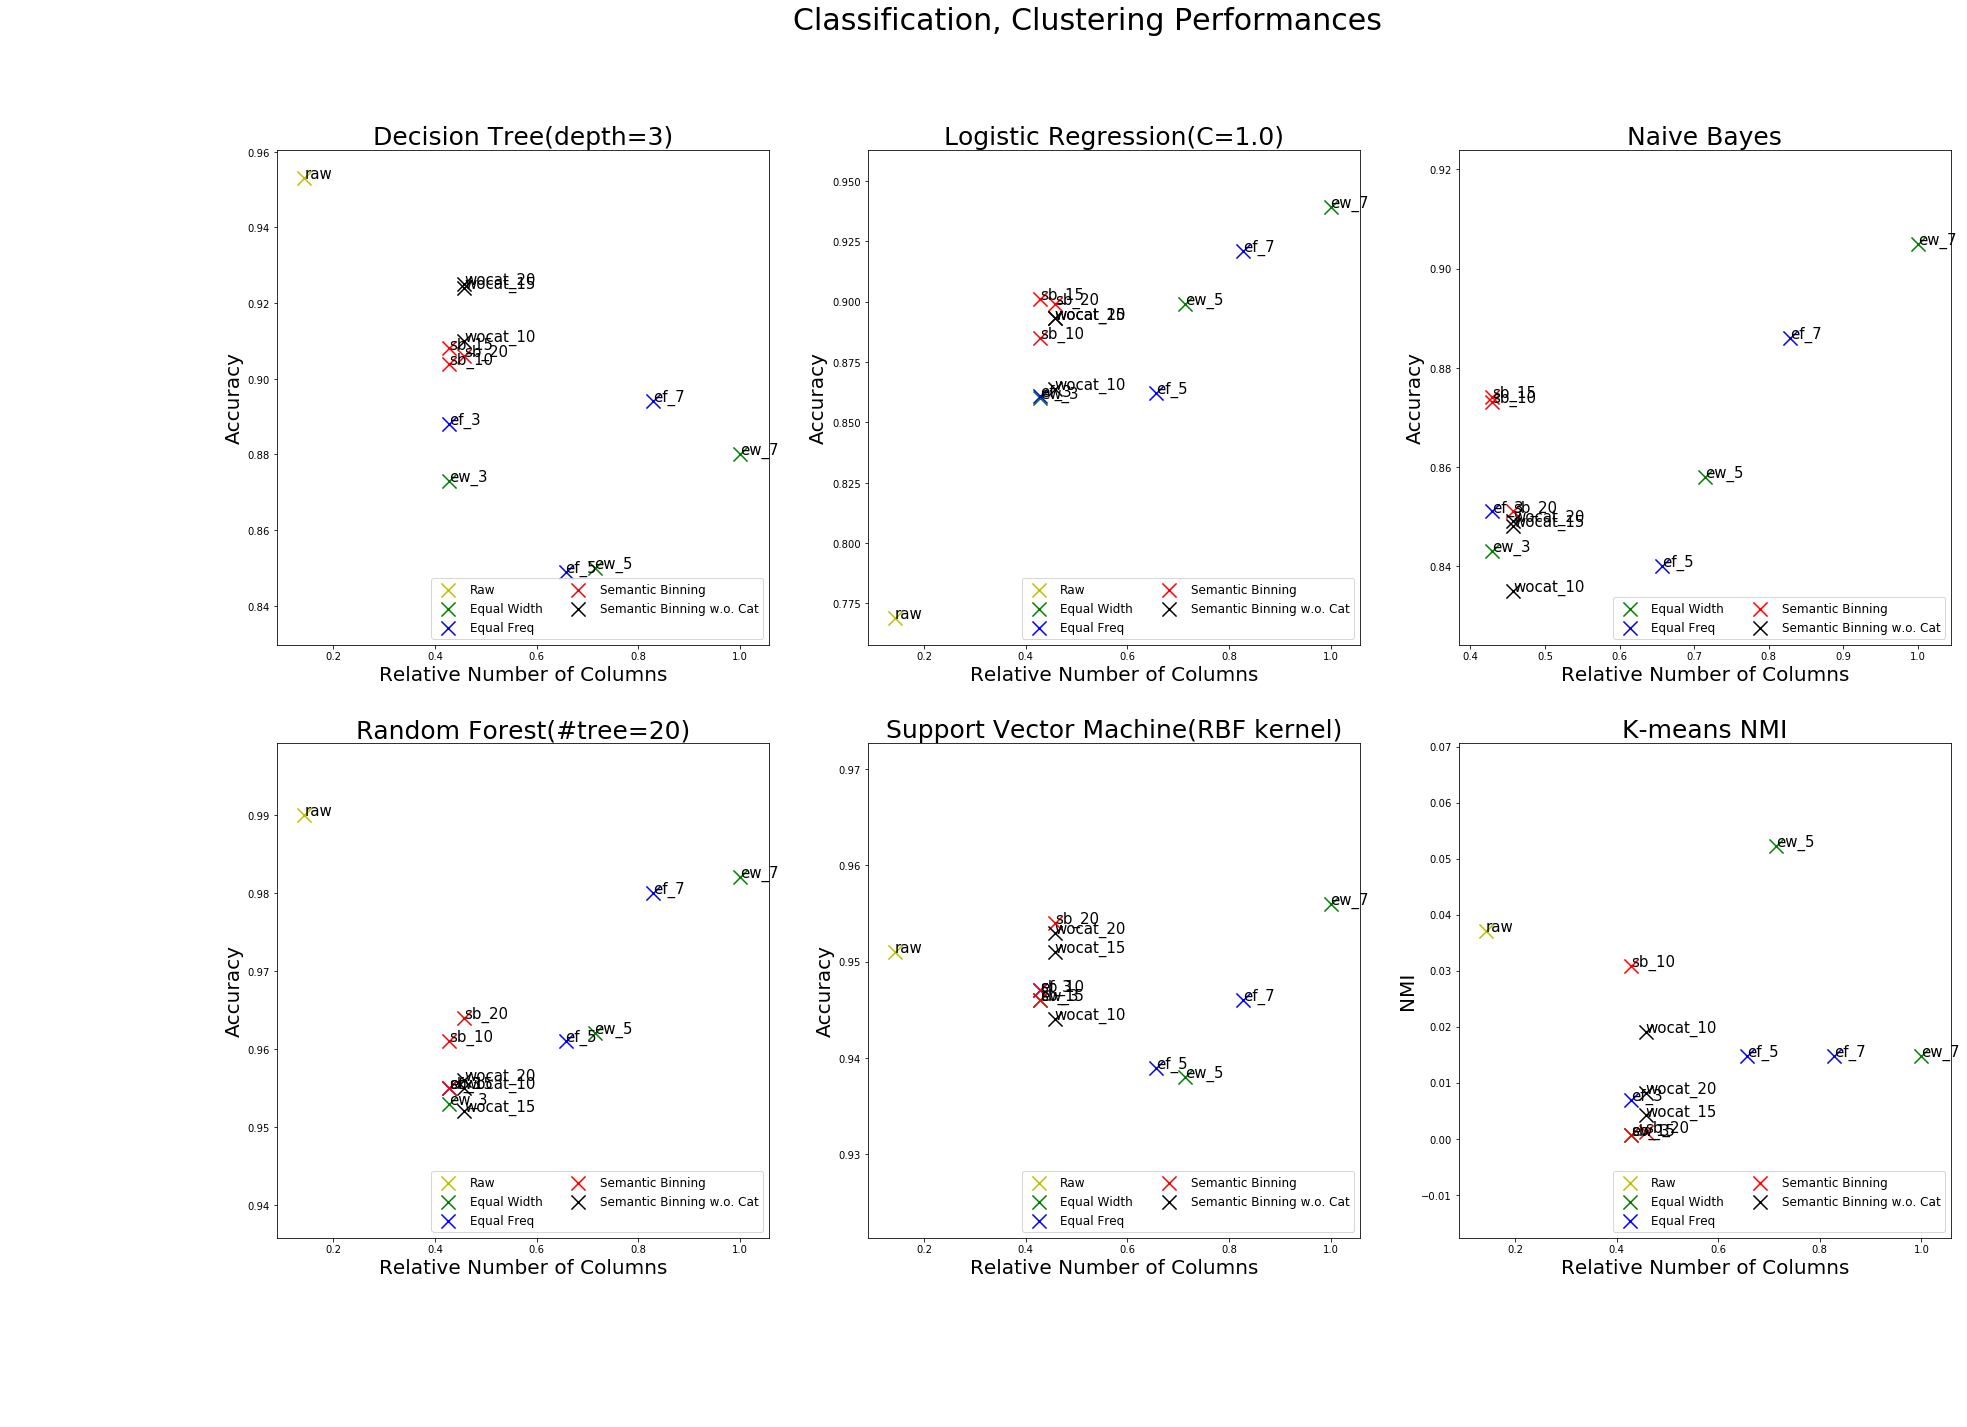

In [10]:
exp.plot_model_comparison_chart(result)

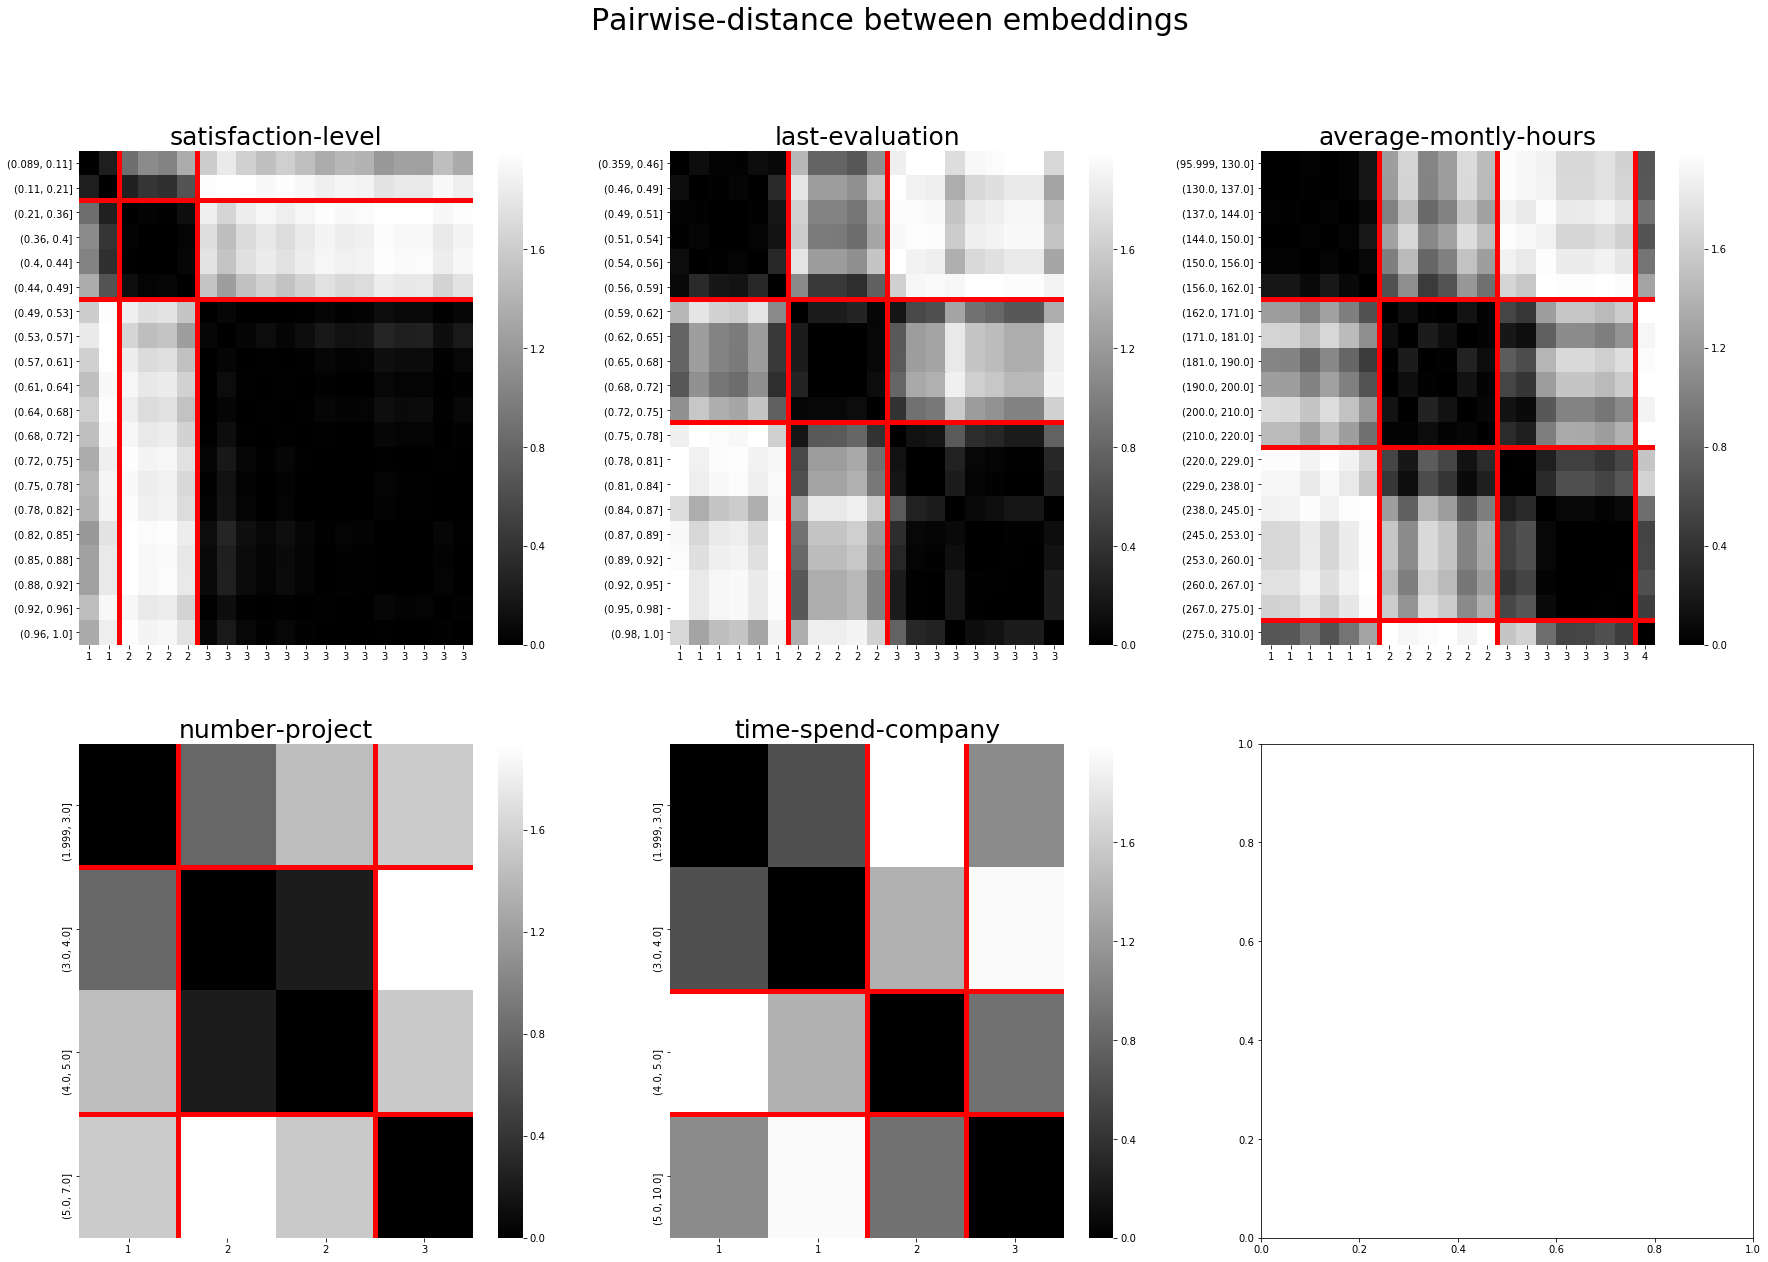

In [11]:
exp.plot_pairwise_distance_matrices()